### Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [2]:
data_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
data_raw.columns = ['review','sentiment']
data_raw.sample(10)

,review,sentiment
105,"Pros:-Good camera - very nice pictures , also ...",1
238,I was very excited to get this headset because...,1
30,"This is a simple little phone to use, but the ...",0
606,"Overall, I would recommend this phone over the...",1
938,Logitech Bluetooth Headset is a 10!.,1
686,The instructions didn't explain that a microph...,0
0,So there is no way for me to plug it in here i...,0
332,The reception is excellent!,1
983,I am going to have to be the first to negative...,0
471,The update procedure is difficult and cumbersome.,0


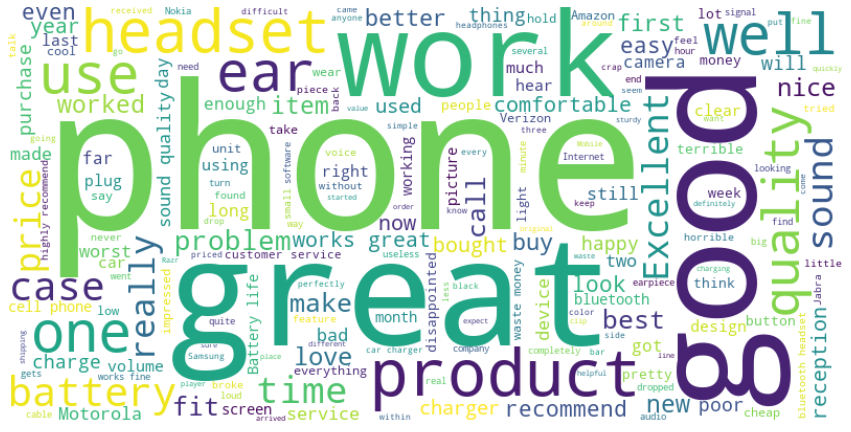

In [3]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(data_raw["review"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

### NB Keywords

In [4]:
pos_keywords = ['amazing', 'best','comfortable', 'easy', 'excellent', 'fabulous', 'fantastic', 'good', 'great', 'happy', 'impressed', 'love', 'loved', 'nice', 'perfectly', 'satisfied','works','worked']
neg_keywords = ['bad', 'beware', 'crap', 'crappy', 'difficult', 'disappointed', 'disappointing', 'hate', 'hated', 'horrible', 'junk', 'not', 'problem', 'return', 'sucks', 'useless', 'waste', 'worst']

for positive in pos_keywords:
    data_raw[str(positive)] = data_raw.review.str.contains(str(positive),case=False)
for negative in neg_keywords:
    data_raw[str(negative)] = data_raw.review.str.contains(str(negative),case=False)
data_raw['sentiment'] = (data_raw['sentiment'] == 1)

In [5]:
data_raw['sentiment'] = (data_raw['sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.

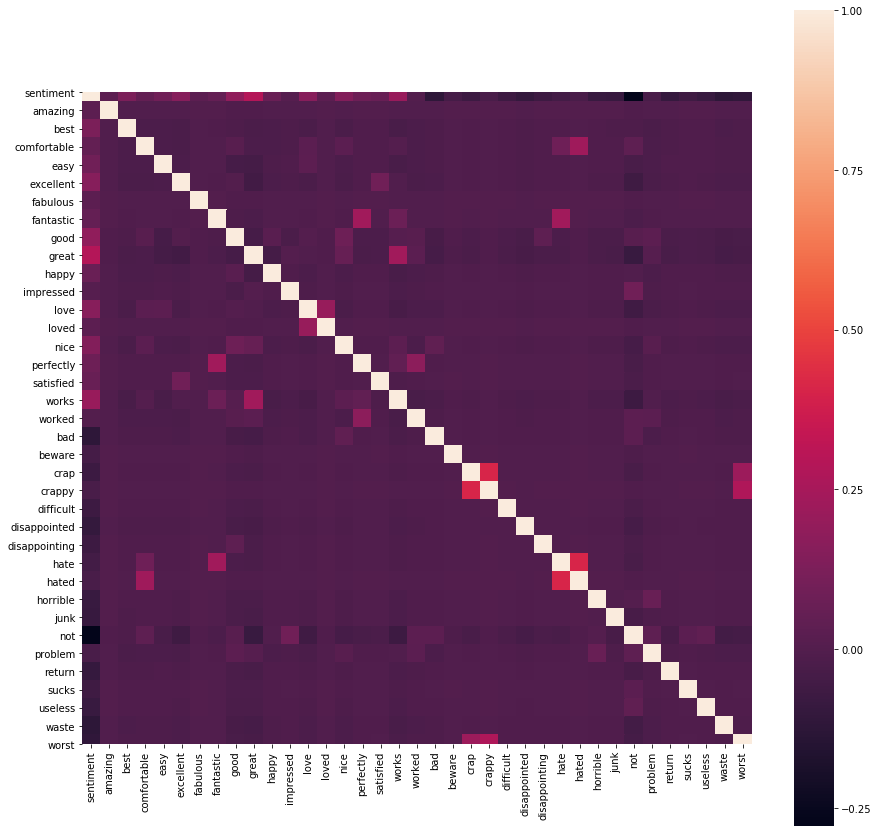

In [7]:
plt.figure(figsize=[15,15])
correlations_map = sns.heatmap(data_raw.corr(),square=True)

In [11]:
data = data_raw[pos_keywords + neg_keywords]
target = data_raw['sentiment']

In [12]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 230


### Testing on other Datasets

In [20]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
yelp = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)

imdb.columns = ['review', 'sentiment']
yelp.columns = ['review', 'sentiment']

### IMDB testing with NB Classifier

In [26]:
for positive in pos_keywords:
    imdb[str(positive)] = imdb.review.str.contains(str(positive),case=False)
for negative in neg_keywords:
    imdb[str(negative)] = imdb.review.str.contains(str(negative),case=False)
imdb['sentiment'] = (imdb['sentiment'] == 1)
data = imdb[pos_keywords + neg_keywords]
target = imdb['sentiment']

In [27]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 256


### Yelp testing with NB Classifier

In [28]:
for positive in pos_keywords:
    yelp[str(positive)] = yelp.review.str.contains(str(positive),case=False)
for negative in neg_keywords:
    yelp[str(negative)] = yelp.review.str.contains(str(negative),case=False)
yelp['sentiment'] = (yelp['sentiment'] == 1)
data = yelp[pos_keywords + neg_keywords]
target = yelp['sentiment']

In [29]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 283
